In [2]:
# my imports
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import openpyxl
import requests
from bs4 import BeautifulSoup
from sqlalchemy import create_engine
import urllib.parse
import psycopg2

### Data Science basics 
#### Data Acquisition

Two important things in DS:
1. What do we want to do? - main topic of the course 
2. How to do it? 

Ask the right questions. Obtain and clean up data. Explore and analyze data. Make the correct conclusions. 

Scientific method. Research. Who worked on that topic?
Learn how to create a complete solution. 
How to communicate its results. 
Learn best practices. 

Algebra, statistics and a little Calculus.

Scientific mindset. 

EDA - exploratory data analysis 

Reproducible research 
Data pipelines
"big" data 

### Important dates:
25 June - 20 August lectures and project 
24-25 August regular exam 

Homework and exam deadline 22 August

Homework = Quiz + lab

Books:
How not to be wrong- Jordan Ellenberg <br>
Python Data Science handbook - Jake VanderPlas <br>
https://jakevdp.github.io/PythonDataScienceHandbook/ <br>
Python for Data Analysis- Wes McKinney <br>
https://wesmckinney.com/book/ <br>

Choose your own adventure. 


### Data Acquisition

1. The scientific method 
2. Setting up the environment (done)
3. Reading data from different sources:<br> a. Text files;<br> b. Excel;<br> c. Web sources;<br> d. SQL databases 
4. Data Consolidation Principles 

#### The scientific method
Ask a question => do research => form Hypothesis => test hp => align / not align with hp => communicate results and next steps (go back to research, form new hp or new tests).

#### Reading data from different sources: 
a. Text files; <br>
b. Excel; <br>
c. Web sources; <br>
d. SQL databases. <br>

In [3]:
pd.DataFrame({"name":["Ivan", "Georgi"], "sirname":["Petrov","Ivanov"], "age":[22, 24]})

,name,sirname,age
0,Ivan,Petrov,22
1,Georgi,Ivanov,24


In [4]:
accidents = pd.read_csv("data/accidents.csv")

In [5]:
accidents

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [6]:
accidents.index

RangeIndex(start=0, stop=6, step=1)

In [7]:
accidents.columns

Index(['Miles from Home', '% of Accidents'], dtype='object')

In [8]:
accidents['Miles from Home']

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: Miles from Home, dtype: object

In [9]:
type(accidents['Miles from Home'])

pandas.core.series.Series

In [10]:
type(accidents[['Miles from Home']])


pandas.core.frame.DataFrame

In [11]:
accidents.columns = ['miles_from_home', 'pct_of_accidents']

In [12]:
accidents

,miles_from_home,pct_of_accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [13]:
accidents.miles_from_home

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: miles_from_home, dtype: object

In [14]:
accidents.shape

(6, 2)

In [15]:
accidents.dtypes

miles_from_home     object
pct_of_accidents     int64
dtype: object

In [16]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
pct_of_accidents,6.0,16.666667,8.733079,6.0,10.25,17.0,21.5,29.0


In [31]:
accidents_with_new_index = accidents.reset_index()

In [32]:
accidents

,miles_from_home,pct_of_accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [33]:
accidents_with_new_index

,index,miles_from_home,pct_of_accidents
0,0,less than 1,23
1,1,1 to 5,29
2,2,6 to 10,17
3,3,11 to 15,8
4,4,16 to 20,6
5,5,over 20,17


#### Pandas - Python for Analytics and Data Science 
```python
import pandas as pd
```

#### Structured and unstructured data
Str: organized in columns
Unstr: some structure, not very clear 

```python
pd.read_table()
```

Data frame / series 

astype() method

Pandas: Zip support if 1 file in archive 

For reading Excel:
```python
pd.read_excel()
```


In [18]:
pd.read_excel('data/xls_sales_data.xls')

,Date,City,Sales
0,2024-06-30,Sofia,2590
1,2024-07-01,Plovdiv,7731
2,2024-07-02,Pernik,4337
3,2024-07-03,Plovdiv,9682
4,2024-07-04,Sofia,2871
5,2024-07-05,Plovdiv,7496
6,2024-07-06,Pernik,508
7,2024-07-07,Plovdiv,6186
8,2024-07-08,Sofia,1027
9,2024-07-09,Plovdiv,5811


In [19]:
pd.read_excel('data/xlsx_sales_data.xlsx')

,Date,City,Sales
0,2024-06-30,Sofia,2590
1,2024-07-01,Plovdiv,7731
2,2024-07-02,Pernik,4337
3,2024-07-03,Plovdiv,9682
4,2024-07-04,Sofia,2871
5,2024-07-05,Plovdiv,7496
6,2024-07-06,Pernik,508
7,2024-07-07,Plovdiv,6186
8,2024-07-08,Sofia,1027
9,2024-07-09,Plovdiv,5811


In [35]:
green_trip_data = pd.read_excel('data/green_tripdata_2015-09.xls')


In [36]:
green_trip_data.shape

(65535, 21)

In [37]:
green_trip_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [39]:
green_trip_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [38]:
green_trip_data.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,65535.0,1.784497,1.0,2.0,2.0,2.0,2.0,0.411174
lpep_pickup_datetime,65535,2015-09-01 21:41:36.600595200,2015-09-01 00:00:00,2015-09-01 13:17:26,2015-09-01 20:08:37,2015-09-02 08:35:17,2015-09-02 16:59:45,NaN
Lpep_dropoff_datetime,65535,2015-09-01 21:56:13.970427904,2015-09-01 00:00:00,2015-09-01 13:30:47,2015-09-01 20:21:49,2015-09-02 08:51:38.500000,2015-09-03 16:09:19,NaN
RateCodeID,65535.0,1.12491,1.0,1.0,1.0,1.0,99.0,0.781101
Pickup_longitude,65535.0,-73.808157,-75.056404,-73.958015,-73.944176,-73.915222,0.0,3.04051
Pickup_latitude,65535.0,40.685263,0.0,40.70067,40.753559,40.804974,41.032986,1.676843
Dropoff_longitude,65535.0,-73.851127,-75.081306,-73.967205,-73.94474,-73.909496,0.0,2.466746
Dropoff_latitude,65535.0,40.706524,0.0,40.704659,40.754356,40.798569,41.227257,1.360617
Passenger_count,65535.0,1.349432,0.0,1.0,1.0,1.0,9.0,1.023215
Trip_distance,65535.0,2.901488,0.0,1.02,1.88,3.65,62.34,3.026139


xlrd library for xls
openpyxl library for xlsx

In [47]:
green_trip_data[['Fare_amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fare_amount,65535.0,12.40389,10.604922,-400.0,6.0,9.5,15.5,400.0


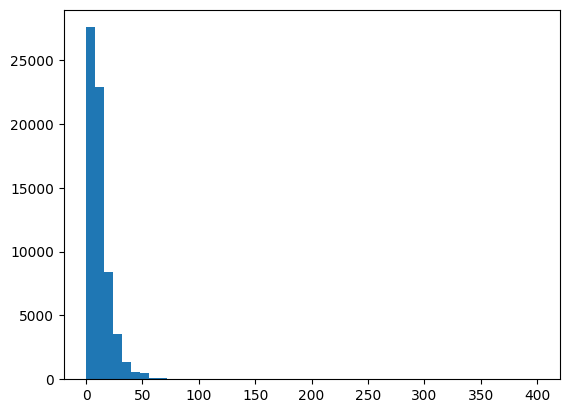

In [50]:
plt.hist(green_trip_data.Fare_amount[green_trip_data.Fare_amount > 0], bins= 50)
plt.show()

In [51]:
green_trip_data.Fare_amount.skew()

np.float64(5.706613389091266)

```Python
import xlrd
import openpyxl
```


### Web sources 
RESTfull API
```python
pd.read_json()
```

In [ ]:
pd.read_json("https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json",
            orient = 'index'
            )

orient = "index" parameter

```python
pd.read_xml()
pd.read_hdf()
```

Use SQL

SQLalchemy library
Create engine

```python
pd.read_sql()
```

### Source for Connection strings:
https://www.connectionstrings.com/

### Source for sqlite db AdventureWorks
https://github.com/nuitsjp/AdventureWorks-for-SQLite/tree/master

```python
# sqlite://<nohostname>/<path>
# where <path> is relative:
engine = create_engine('sqlite:///foo.db')

# or absolute, starting with a slash:
engine = create_engine('sqlite:////absolute/path/to/foo.db')
```

In [58]:
#SQLite
engine = sqlalchemy.create_engine("sqlite:///data/example.db")

In [59]:
pd.read_sql_table('users', engine)

,id,name,age
0,1,Alice,30
1,2,Bob,24
2,3,Charlie,29


In [61]:
pd.read_sql('select * from users where age > 25', engine)

,id,name,age
0,1,Alice,30
1,3,Charlie,29


Use SQL queries 

```python
query = """
select * from table
limit 5
"""
```
psycopg2 for Postgres

```python
# postgre SQL v.1
user = 'user'
password = urllib.parse.quote_plus("password")
host = '127.0.0.1'
port = '5432'
database = 'dbname'


connection_str = f'postgresql://{user}:{password}@{host}:{port}/{database}'

engine = create_engine(connection_str)
```

```python
# postgre SQL v.2

conn = psycopg2.connect(
    dbname='name',
    host='localhost',
    user='user',
    password='password'
)

cur = conn.cursor()
cur.execute("""SELECT * from table_name""")
rows = cur.fetchall()
for row in rows:
    print(row)
conn.close()
```


### Web Scraping  / Web Crawling 
```python
import requests
from bs4 import BeautifulSoup
```

In [20]:
base_url = 'https://www.scrapethissite.com/pages/forms/'

In [21]:
page = requests.get(base_url)

In [22]:
soup = BeautifulSoup(page.text, 'html')

In [23]:
table = soup.find('table', class_ = 'table')

In [24]:
headers = table.find_all('th')

In [25]:
titles = [header.text.strip() for header in headers]

In [26]:
df = pd.DataFrame(columns=titles)

In [27]:
rows = table.find_all('tr')[1:]

In [28]:
for row in rows:
    row_data = row.find_all('td')
    data = [record.text.strip() for record in row_data]
    df.loc[len(df)] = data

In [29]:
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.55,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
5,Edmonton Oilers,1990,37,37,,0.463,272,272,0
6,Hartford Whalers,1990,31,38,,0.388,238,276,-38
7,Los Angeles Kings,1990,46,24,,0.575,340,254,86
8,Minnesota North Stars,1990,27,39,,0.338,256,266,-10
9,Montreal Canadiens,1990,39,30,,0.487,273,249,24


Selenium library

#### Data Consolidation Principles 

Join and Concatenate

Pandas Merge method == join

Cartesian join + intersection 

Concat

https://pandas.pydata.org/docs/user_guide/merging.html

#### NB! Document actions and processes (why) and the results
#### NB! Use code for data cleaning and transformation 